# Multiple Linear Regression
## bike-sharing Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


Essentially, the company wants —


Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands


**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:

# # Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# statsmodels	0.14.4
# sklearn	1.5.2

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
bike_df = pd.read_csv("day.csv")

In [6]:
# Check the head of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [7]:
bike_df.shape

(730, 16)

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Cleaning

drop un wanted data and 

In [10]:
bike_df.isnull().sum() #checking for missing values


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# instant is index, so drop the colum
bike_df.drop(['instant'],axis=1,inplace=True)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# casual and registered are noting but target variable cnt so drop the colum
bike_df.drop(['casual', 'registered'],axis=1,inplace=True)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [14]:
# from data description, 	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
# update the season column

bike_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# from whether list update the below vaues 
# 	+ weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bike_df['weathersit'].replace({1:"Few_Clouds",2:"Mist_cloudy",3:"Light_Rain",4:'Heavy_Rain'},inplace=True)
bike_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [16]:

bike_df['mnth'].replace({1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',
                  7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'},inplace=True)
bike_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,January,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,January,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,January,0,1,1,Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,January,0,2,1,Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,January,0,3,1,Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bike_df['weekday'].replace({0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday ',5: 'Friday',
                  6: 'Saturday'},inplace=True)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,January,0,Monday,1,Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,January,0,Tuesday,1,Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,January,0,Wednesday,1,Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 74.3+ KB


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

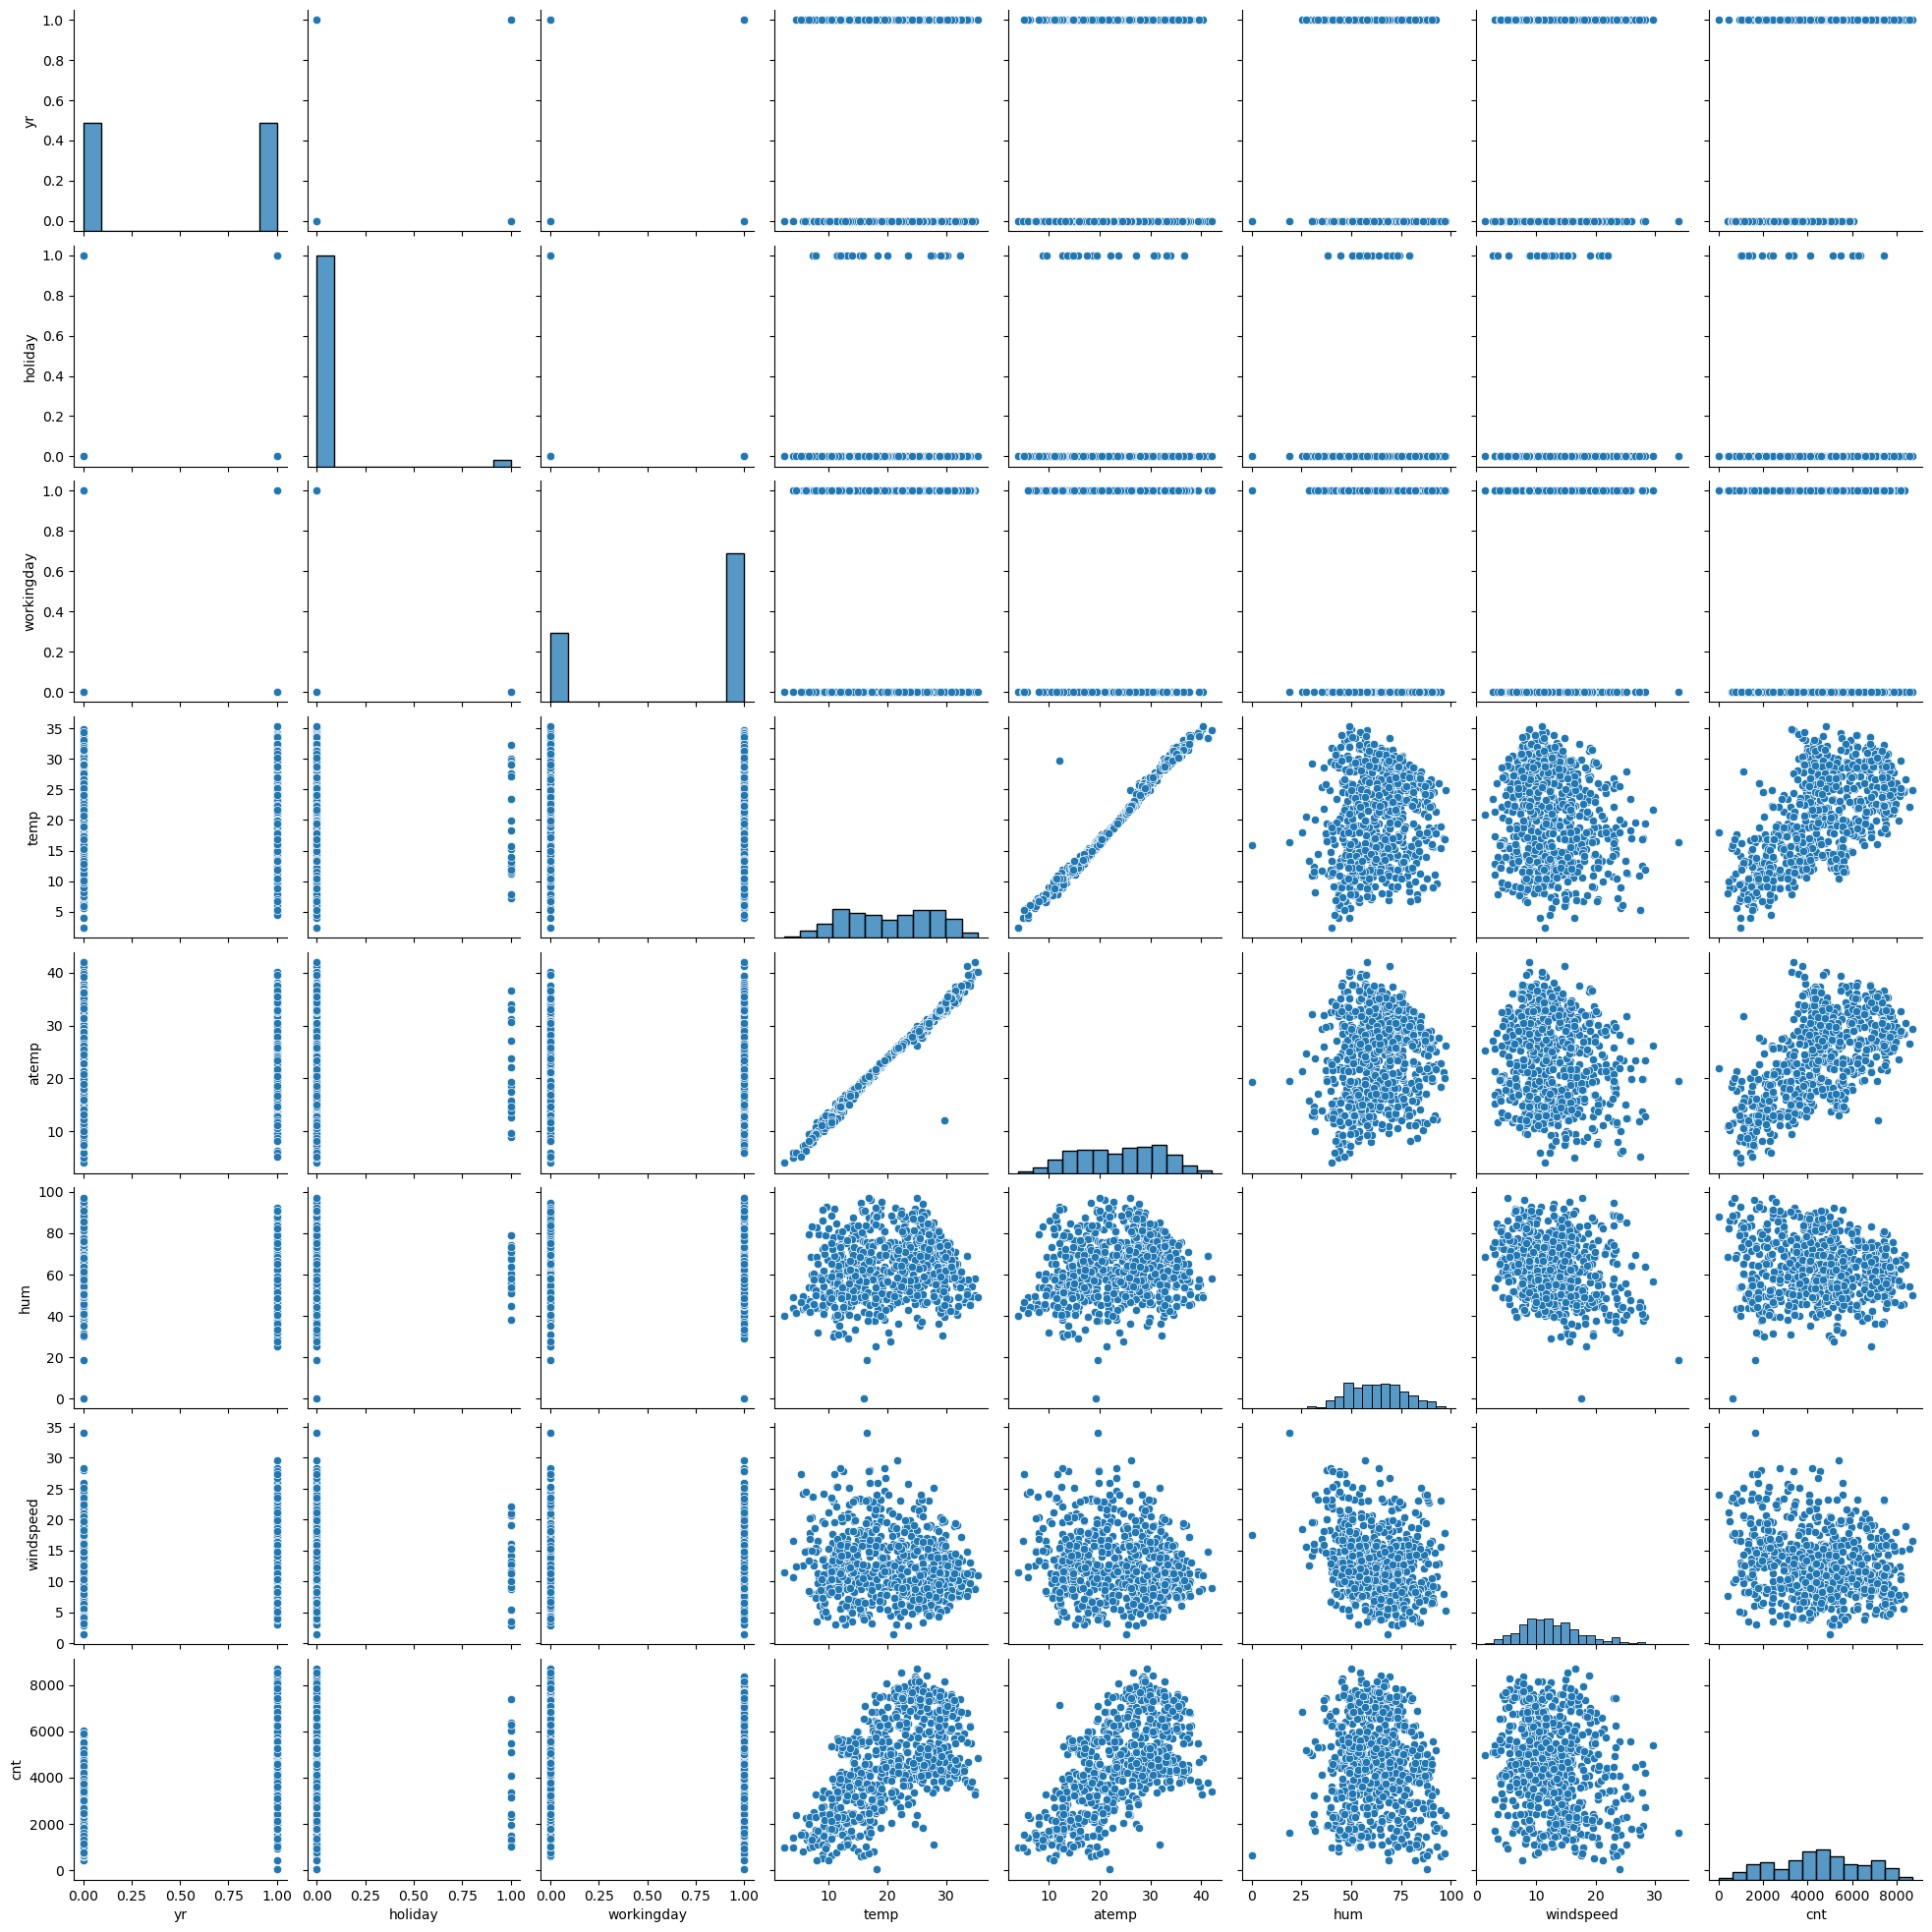

In [19]:
sns.pairplot(bike_df)
plt.show()

#### From the above plot we can see temp and atemp has linear relation with cnt 

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

<function matplotlib.pyplot.show(close=None, block=None)>

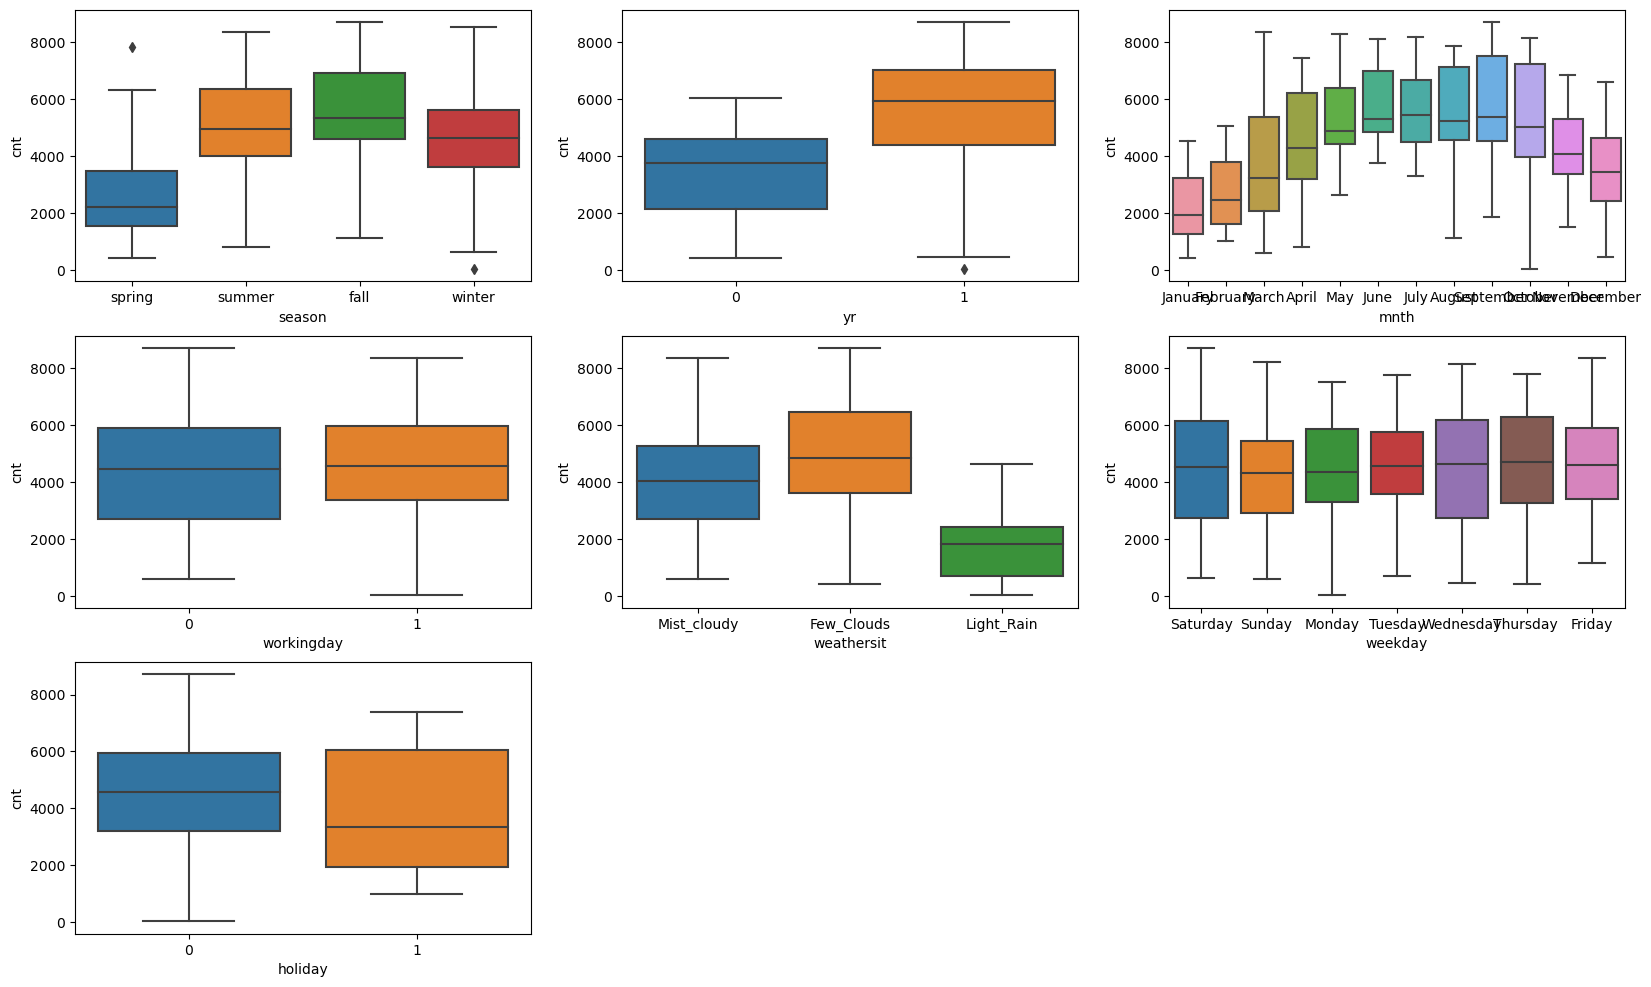

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)

plt.show

### Box plot information & observations

- Most of bike bookings happening in fall sesion, and spring has less bookings

- Bookings increased from 2018 to 2019

- August, September and October had good amount of bookings 

- Bookings are more on Few_clouns and mist_cloudy wether 

- weekday looks similar on all days

- seems there are outlier in holidays


## Step 4: Data Preparation

- we can see that your dataset has columns with values (Categorical Variables) 

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s

 
convert non numeric to numeric -->  category variables to yes to 1 and No to 0
this is called encoding step
    - endocing
        - binary categoy variable to 0 and 1
        - other category variable to dummay variable


In [21]:
#  we dont have any binary categoy variable to map, so use dummy variable 

In [22]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,January,0,Monday,1,Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,January,0,Tuesday,1,Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,January,0,Wednesday,1,Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

The variable `season`, `mnth`, `weekday`, `weathersit` has multiple levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [23]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 74.3+ KB


In [24]:
Season_status = pd.get_dummies(bike_df['season'])
Season_status.head(100)

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
95,0,0,1,0
96,0,0,1,0
97,0,0,1,0
98,0,0,1,0


In [25]:
season_status = pd.get_dummies(bike_df['season'], drop_first = True)
mnth_status = pd.get_dummies(bike_df['mnth'], drop_first = True)
weekday_status = pd.get_dummies(bike_df['weekday'], drop_first = True)
weathersit_status = pd.get_dummies(bike_df['weathersit'], drop_first = True)

In [26]:
season_status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
# Add the results to the original housing dataframe

bike_df = pd.concat([bike_df, season_status], axis = 1)
bike_df = pd.concat([bike_df, mnth_status], axis = 1)
bike_df = pd.concat([bike_df, weekday_status], axis = 1)
bike_df = pd.concat([bike_df, weathersit_status], axis = 1)
bike_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
0,01-01-2018,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,18.18125,...,0,0,0,1,0,0,0,0,0,1
1,02-01-2018,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,17.68695,...,0,0,0,0,1,0,0,0,0,1
2,03-01-2018,spring,0,January,0,Monday,1,Few_Clouds,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,spring,0,January,0,Tuesday,1,Few_Clouds,8.200000,10.60610,...,0,0,0,0,0,0,1,0,0,0
4,05-01-2018,spring,0,January,0,Wednesday,1,Few_Clouds,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [230]:
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dteday       730 non-null    object 
 1   season       730 non-null    object 
 2   yr           730 non-null    int64  
 3   mnth         730 non-null    object 
 4   holiday      730 non-null    int64  
 5   weekday      730 non-null    object 
 6   workingday   730 non-null    int64  
 7   weathersit   730 non-null    object 
 8   temp         730 non-null    float64
 9   atemp        730 non-null    float64
 10  hum          730 non-null    float64
 11  windspeed    730 non-null    float64
 12  cnt          730 non-null    int64  
 13  spring       730 non-null    uint8  
 14  summer       730 non-null    uint8  
 15  winter       730 non-null    uint8  
 16  August       730 non-null    uint8  
 17  December     730 non-null    uint8  
 18  February     730 non-null    uint8  
 19  January 

In [231]:
# Drop original columns (season, mnth, weekday, weathersit) as we have created the dummies for it

bike_df.drop(['season'], axis = 1, inplace = True)
bike_df.drop(['mnth'], axis = 1, inplace = True)
bike_df.drop(['weekday'], axis = 1, inplace = True)
bike_df.drop(['weathersit'], axis = 1, inplace = True)


In [232]:
bike_df.head()


,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
0,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,0,0,0,0,0,1
1,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,1
2,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [233]:
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dteday       730 non-null    object 
 1   yr           730 non-null    int64  
 2   holiday      730 non-null    int64  
 3   workingday   730 non-null    int64  
 4   temp         730 non-null    float64
 5   atemp        730 non-null    float64
 6   hum          730 non-null    float64
 7   windspeed    730 non-null    float64
 8   cnt          730 non-null    int64  
 9   spring       730 non-null    uint8  
 10  summer       730 non-null    uint8  
 11  winter       730 non-null    uint8  
 12  August       730 non-null    uint8  
 13  December     730 non-null    uint8  
 14  February     730 non-null    uint8  
 15  January      730 non-null    uint8  
 16  July         730 non-null    uint8  
 17  June         730 non-null    uint8  
 18  March        730 non-null    uint8  
 19  May     

## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [234]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [235]:
bike_df_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
653,16-10-2019,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,...,1,0,0,0,0,0,1,0,0,0
576,31-07-2019,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,...,0,0,0,0,0,0,1,0,0,0
426,03-03-2019,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,...,0,0,0,1,0,0,0,0,0,1
728,30-12-2019,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,...,0,0,0,0,1,0,0,0,0,0
482,28-04-2019,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,...,0,0,0,1,0,0,0,0,0,1


In [236]:
bike_df_test.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
184,04-07-2018,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,...,0,0,1,0,0,0,0,0,0,1
535,20-06-2019,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,...,0,0,0,0,0,0,0,1,0,0
299,27-10-2018,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,...,1,0,0,0,0,1,0,0,0,1
221,10-08-2018,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,...,0,0,0,0,0,0,0,1,0,0
152,02-06-2018,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,...,0,0,0,0,0,1,0,0,0,0


### Rescaling the Features 

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [237]:
# a temp and temp has 0.99 corelation, so remove atemp from the data 

bike_df_train = bike_df_train.drop(columns=['atemp'])
bike_df_test = bike_df_test.drop(columns=['atemp'])

In [238]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [239]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum','windspeed']

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [240]:
bike_df_train.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
653,16-10-2019,1,0,1,0.509887,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,31-07-2019,1,0,1,0.815169,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,03-03-2019,1,0,0,0.442393,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,30-12-2019,1,0,0,0.245101,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,28-04-2019,1,0,0,0.395666,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [241]:
bike_df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


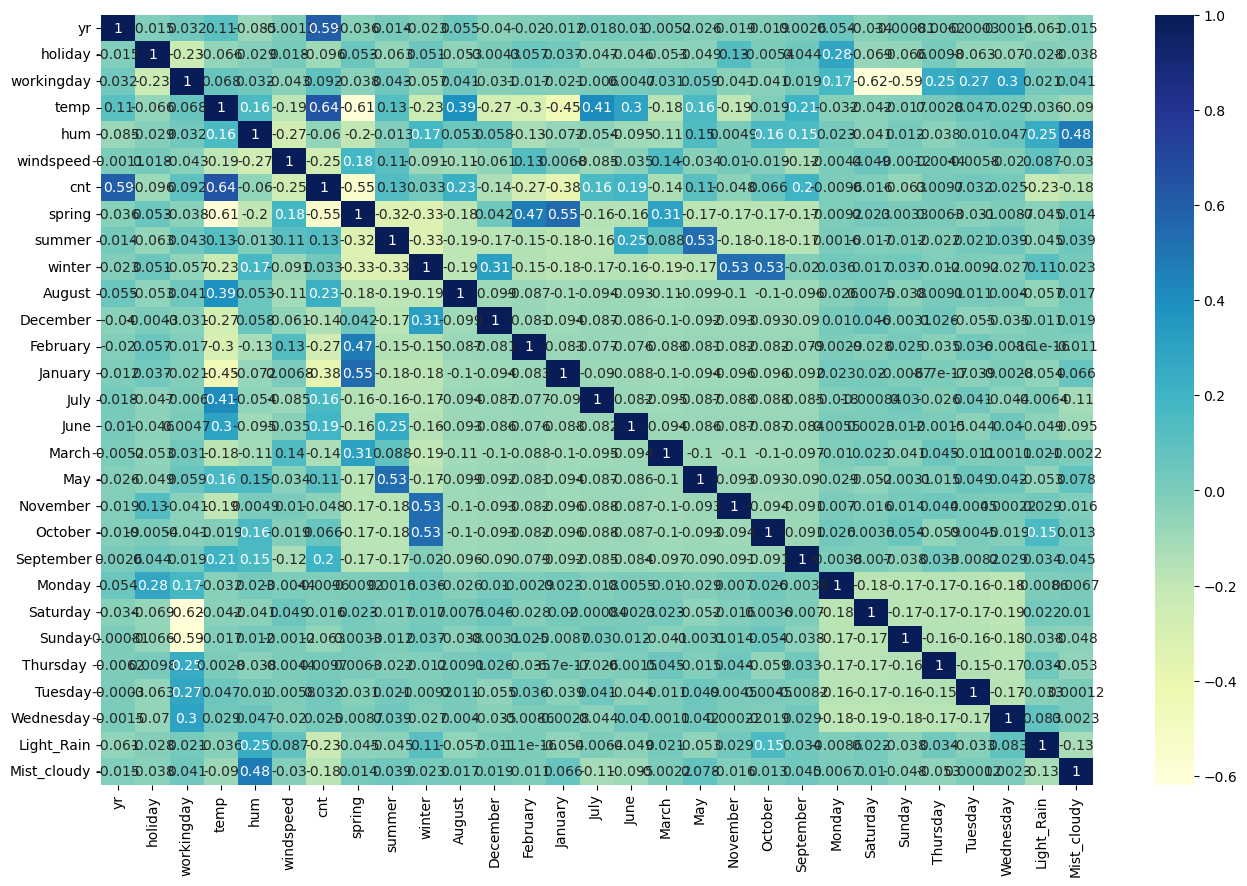

In [242]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [243]:
bike_df_train.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
653,16-10-2019,1,0,1,0.509887,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,31-07-2019,1,0,1,0.815169,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,03-03-2019,1,0,0,0.442393,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,30-12-2019,1,0,0,0.245101,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,28-04-2019,1,0,0,0.395666,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [244]:
bike_df_test.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
184,04-07-2018,0,1,0,29.793347,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,20-06-2019,1,0,1,32.082500,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,27-10-2018,0,0,1,19.270000,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,10-08-2018,0,0,1,31.433347,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,02-06-2018,0,0,1,29.315000,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [245]:
bike_df_train = bike_df_train.drop(columns=['dteday'])
bike_df_test = bike_df_test.drop(columns=['dteday'])

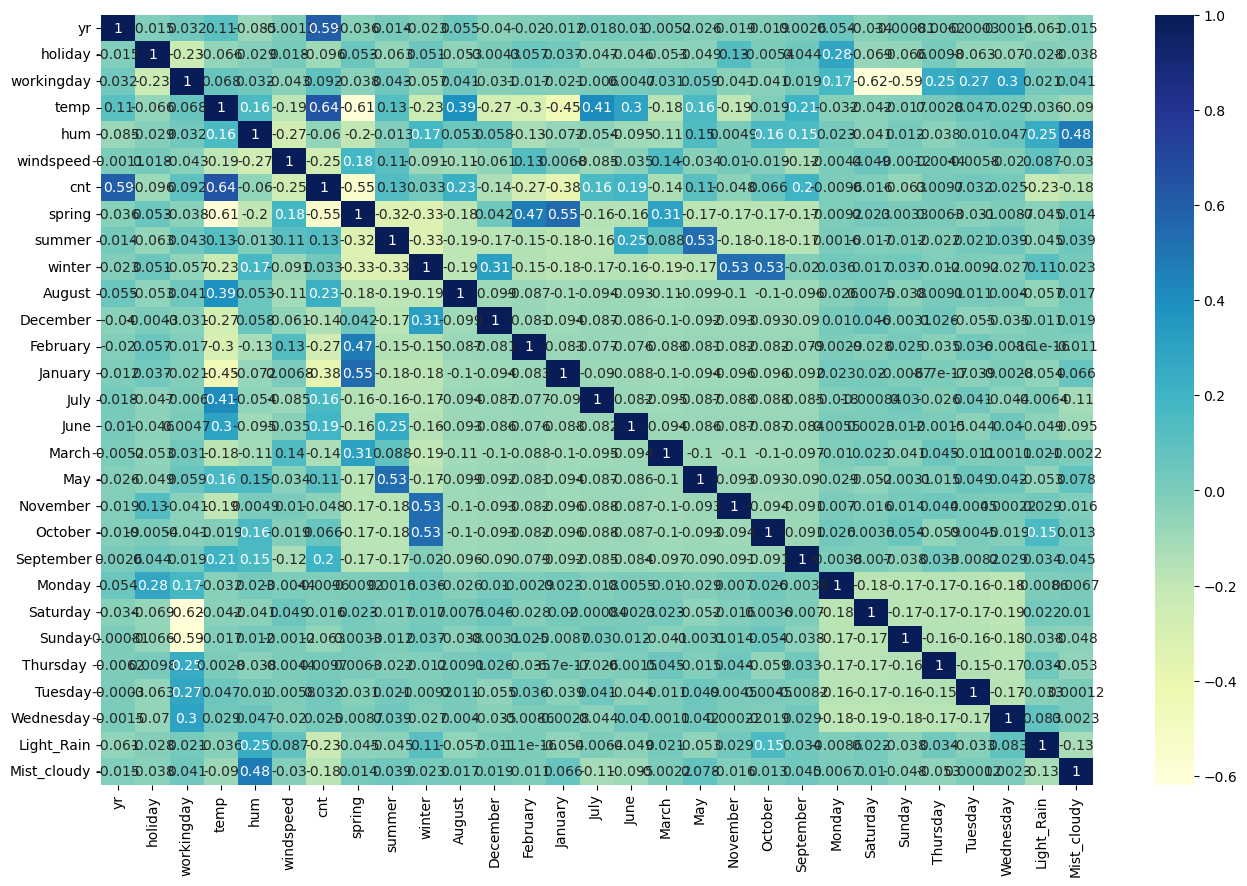

In [246]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [247]:
# As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

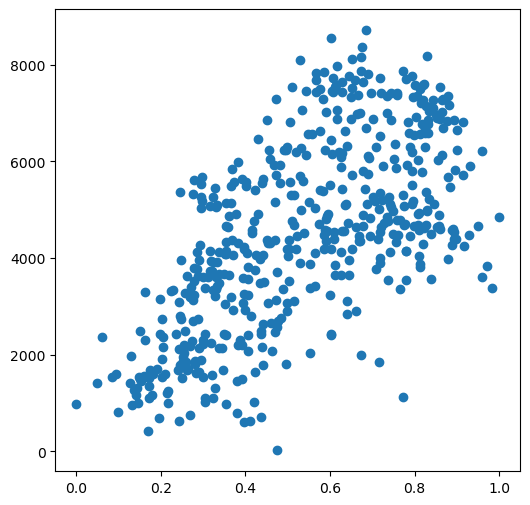

In [248]:
plt.figure(figsize=[6,6])
plt.scatter(bike_df_train.temp, bike_df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [249]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [250]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [251]:
lr.params

const    1497.882426
temp     5562.458744
dtype: float64

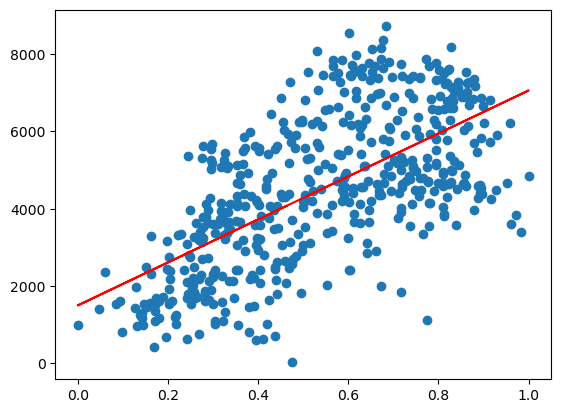

In [252]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1497.8 + 5562.4*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [253]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           5.80e-61
Time:                        00:20:13   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [254]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [255]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     714.129738
temp     5072.292387
yr       2061.858406
dtype: float64

In [256]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          9.25e-130
Time:                        00:20:13   Log-Likelihood:                -4288.4
No. Observations:                 510   AIC:                             8583.
Df Residuals:                     507   BIC:                             8596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        714.1297    129.839      5.500      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.690` from `0.414`.


### Adding all the variables to the model

In [257]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday ', 'Tuesday', 'Wednesday', 'Light_Rain',
       'Mist_cloudy'],
      dtype='object')

#### Model 1


In [258]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const          2147.874512
yr             2017.549844
holiday          90.962141
workingday      846.515447
temp           3916.282212
hum           -1315.447663
windspeed     -1620.652248
spring         -418.598099
summer          336.594431
winter          920.021411
August          125.199371
December       -396.232619
February       -280.593454
January        -545.654115
July           -350.722818
June            -25.835995
March             9.084485
May             208.086047
November       -363.771604
October          65.481937
September       704.572642
Monday         -181.721302
Saturday        842.210158
Sunday          368.186767
Thursday        -80.285776
Tuesday        -164.190546
Wednesday       -46.828209
Light_Rain    -2237.692692
Mist_cloudy    -530.789140
dtype: float64

In [259]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          8.74e-182
Time:                        00:20:13   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2147.8745    306.272      7.013      

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [260]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [261]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.58
21,Saturday,19.72
22,Sunday,18.35
6,spring,10.79
8,winter,9.50
7,summer,8.29
3,temp,7.12
17,November,6.80
18,October,6.59
9,August,6.43


In [262]:
#### Model 2


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `March` as it has a very high p-value of `0.966`. Let's go ahead and drop this variables

In [263]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('March', 1,)

In [264]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [265]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          8.33e-183
Time:                        00:20:13   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     483   BIC:                             8364.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2152.4346    286.674      7.508      

In [266]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.88
20,Saturday,17.22
21,Sunday,16.19
6,spring,9.69
8,winter,9.18
7,summer,7.98
3,temp,6.93
9,August,5.71
13,July,5.14
16,November,4.87


In [267]:
#### Model 3

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. Let's go ahead and drop this variables "March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday'"

In [268]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday ', 'Tuesday', 'Wednesday', 'Light_Rain',
       'Mist_cloudy'],
      dtype='object')

In [269]:
# Dropping highly correlated variables and insignificant variables

X1 = X_train.drop(columns=['March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday'])


In [270]:
# Build a fitted model
X_train_lm = sm.add_constant(X1)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [271]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          7.12e-188
Time:                        00:20:13   Log-Likelihood:                -4098.3
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     488   BIC:                             8334.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2291.3484    401.054      5.713      

In [272]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.53
2,temp,22.61
1,workingday,19.86
5,spring,6.09
16,Saturday,5.52
17,Sunday,5.30
4,windspeed,5.09
7,winter,4.45
6,summer,3.75
10,January,2.43


In [273]:
#### Model 4

Removing 'Sunday', 'Tuesday', 'summer', 'May', 'Monday' feature because it has p value greater than 0.05


In [274]:
X2= X_train.drop(columns=['March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday', 'Sunday', 'Tuesday','summer', 'May', 'Monday'])


In [275]:
# Build a fitted model
X_train_lm = sm.add_constant(X2)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [276]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.17e-190
Time:                        00:20:13   Log-Likelihood:                -4105.5
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     493   BIC:                             8317.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2853.7894    288.620      9.888      

#### By this model we removed all the columns which is having more p-value

In [277]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.64
2,temp,18.17
1,workingday,4.67
4,windspeed,4.19
5,spring,4.15
6,winter,2.99
9,January,2.38
15,Mist_cloudy,2.26
0,yr,2.08
8,February,1.91


In [278]:
#### Model 5

Removing 'hum' due to high vif score.


In [279]:
X3= X_train.drop(columns=['March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday', 'Sunday', 'Tuesday','summer', 'May', 'Monday', 'hum'])


In [280]:
# Build a fitted model
X_train_lm = sm.add_constant(X3)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [281]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          8.46e-189
Time:                        00:20:15   Log-Likelihood:                -4112.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2235.1185    233.695      9.564      

In [282]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.79
1,workingday,4.57
3,windspeed,4.18
4,spring,3.83
5,winter,2.60
8,January,2.22
0,yr,2.07
7,February,1.88
12,Saturday,1.82
10,November,1.79


'temp' is an important column so now we will compare r2 score for the model with and without 'temp'

Now we will make two sub models named

- Model 5.1 - It will have 'temp' column and not have 'workingday' column

- Model 5.2 - It will have 'workingday' column and will not have 'temp' column


In [283]:
# remove 'workingday'

X4= X_train.drop(columns=['March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday', 'Sunday', 'Tuesday','summer', 'May', 'Monday', 'hum', 'workingday'])


In [284]:
# Build a fitted model
X_train_lm = sm.add_constant(X4)

lr_5_1 = sm.OLS(y_train, X_train_lm).fit()

In [285]:
# Print the summary of the model
print(lr_5_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          8.48e-185
Time:                        00:20:17   Log-Likelihood:                -4124.3
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     495   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2609.0730    226.232     11.533      

In [286]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.74
2,windspeed,4.09
3,spring,3.76
4,winter,2.58
7,January,2.19
0,yr,2.07
6,February,1.87
9,November,1.79
5,December,1.55
13,Mist_cloudy,1.53


In [287]:
# remove 'temp'

X5= X_train.drop(columns=['March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday', 'Sunday', 'Tuesday','summer', 'May', 'Monday', 'hum', 'temp'])


In [288]:
# Build a fitted model
X_train_lm = sm.add_constant(X5)

lr_5_2 = sm.OLS(y_train, X_train_lm).fit()

In [289]:
# Print the summary of the model
print(lr_5_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     142.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.50e-163
Time:                        00:20:20   Log-Likelihood:                -4175.0
No. Observations:                 510   AIC:                             8380.
Df Residuals:                     495   BIC:                             8443.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4541.0779    143.743     31.592      

In [290]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,3.76
2,windspeed,3.51
1,workingday,3.19
4,winter,2.60
7,January,2.17
0,yr,1.88
6,February,1.86
9,November,1.77
11,Saturday,1.56
5,December,1.54


 Model 5.1 - r2 score - 0.837
 Model 5.2 - r2 score - 0.801

We will remove 'workingday' column even though it has second highest vif value. because its giving low r2 score 


#### Building final model 

In [291]:
# remove 'workingday'

X6= X_train.drop(columns=['March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday', 'Sunday', 'Tuesday','summer', 'May', 'Monday', 'hum', 'workingday'])


In [292]:
# Build a fitted model
X_train_lm = sm.add_constant(X6)

lr_final = sm.OLS(y_train, X_train_lm).fit()

In [293]:
# Print the summary of the model
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          8.48e-185
Time:                        00:20:22   Log-Likelihood:                -4124.3
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     495   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2609.0730    226.232     11.533      

In [294]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.74
2,windspeed,4.09
3,spring,3.76
4,winter,2.58
7,January,2.19
0,yr,2.07
6,February,1.87
9,November,1.79
5,December,1.55
13,Mist_cloudy,1.53


### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [295]:
lr_final.params


const          2609.073032
yr             2051.159533
temp           3354.119377
windspeed     -1394.401671
spring         -774.444149
winter          567.398062
December       -557.684535
February       -407.281541
January        -709.939106
July           -528.433026
November       -531.082388
September       431.475735
Saturday        191.973208
Light_Rain    -2549.746736
Mist_cloudy    -695.077396
dtype: float64

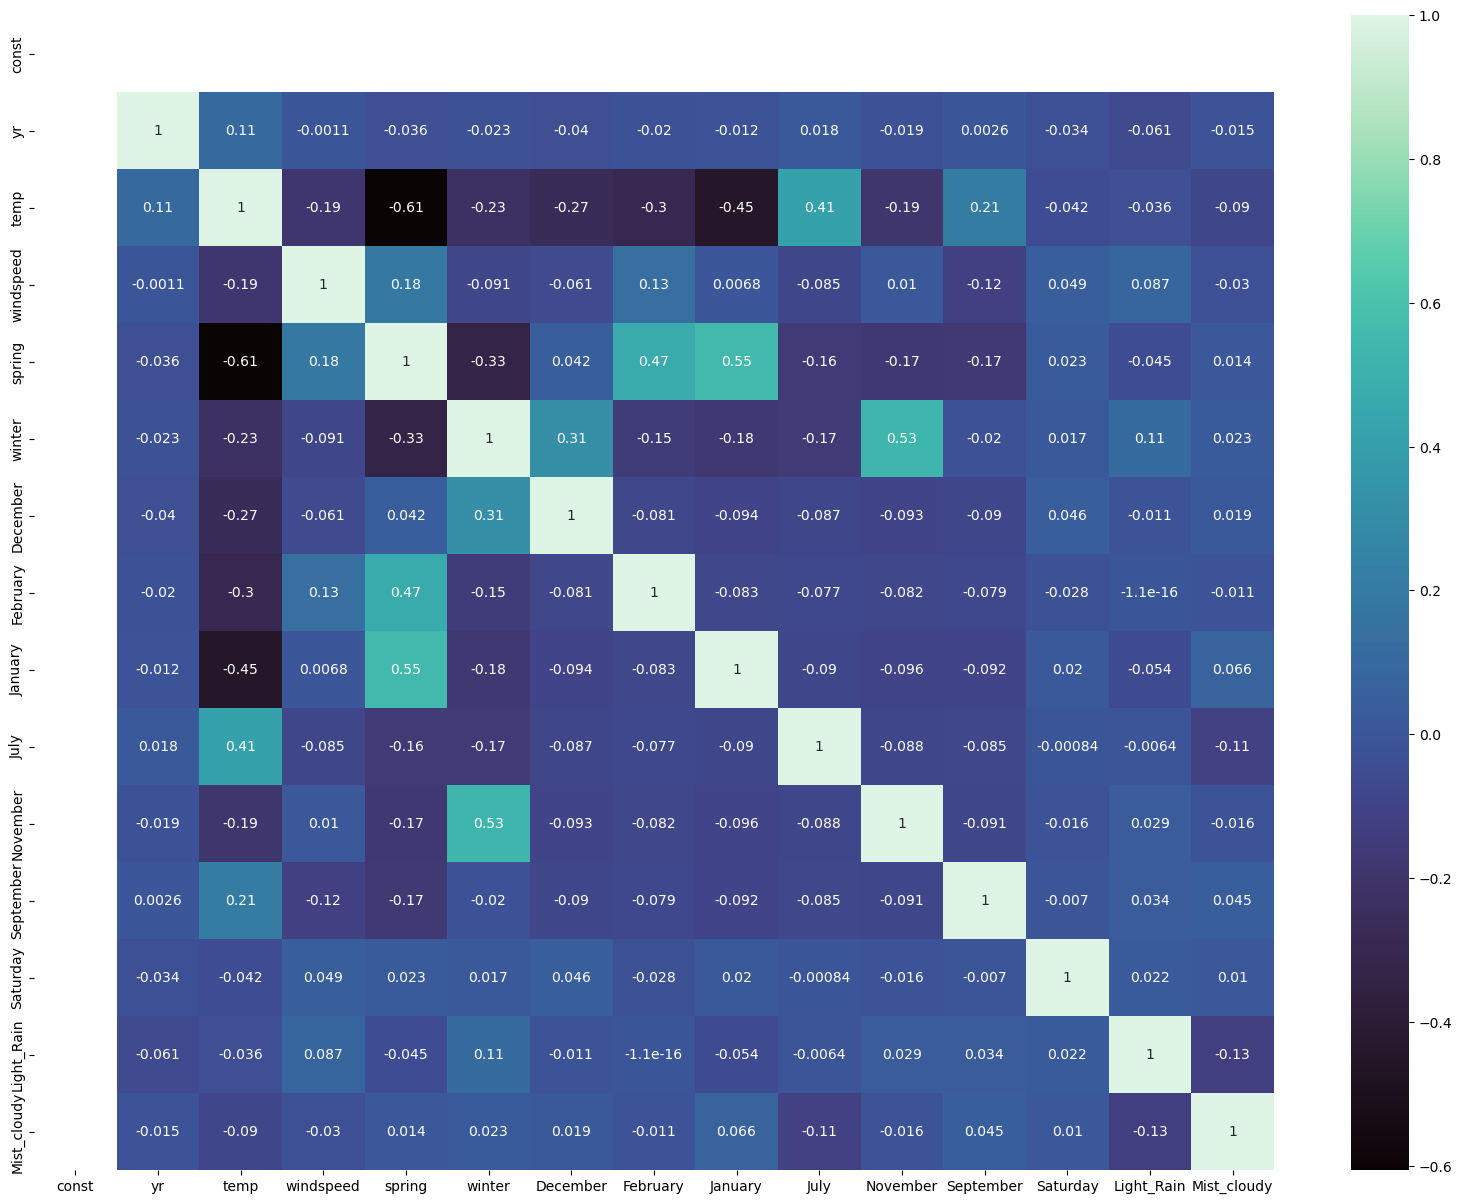

In [296]:
# heatmap for the final model dataframe.
plt.figure(figsize=(20,15))
sns.heatmap(X_train_lm.corr(),annot=True,cmap='mako')
plt.show()


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [297]:
y_train_cnt = lr_final.predict(X_train_lm)

Text(0.5, 0, 'Errors')

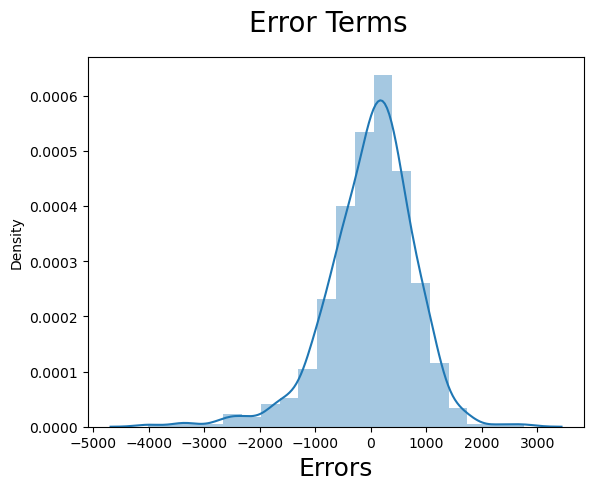

In [298]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [299]:
# Mean of Residuals
(y_train-y_train_cnt).mean()


-3.714661693711783e-12

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [300]:
bike_df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday ', 'Tuesday',
       'Wednesday', 'Light_Rain', 'Mist_cloudy'],
      dtype='object')

In [301]:
num_vars = ['temp','hum','windspeed']

bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [302]:
bike_df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Rain,Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [303]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [306]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
400    2947
702    6606
127    4333
640    7572
72     2046
Name: cnt, Length: 219, dtype: int64

In [309]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday ', 'Tuesday', 'Wednesday', 'Light_Rain',
       'Mist_cloudy'],
      dtype='object')

In [310]:
# Adding constant variable to test dataframe

X7= X_test.drop(columns=['March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday', 'Sunday', 'Tuesday','summer', 'May', 'Monday', 'hum', 'workingday'])

X_test_finalModel = sm.add_constant(X7)

In [311]:
# Making predictions using the final model
y_train_cnt = lr_final.predict(X_train_lm)
y_pred_finalModel = lr_final.predict(X_test_finalModel)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

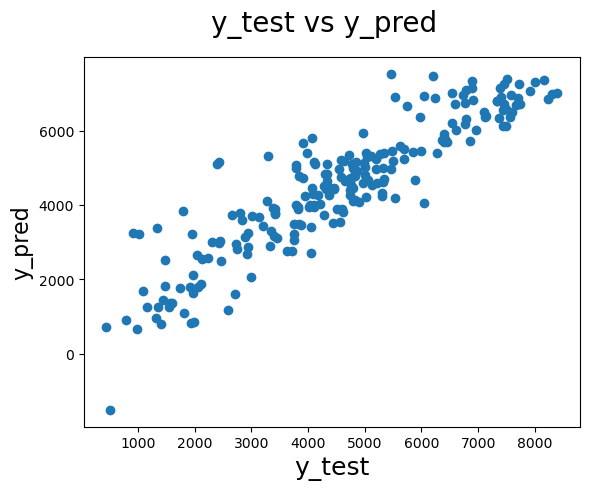

In [312]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_finalModel)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [313]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred_finalModel)
rsquared_test = r2_score(y_test, y_pred_finalModel)
rsquared_train = r2_score(y_train, y_train_cnt)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))


R-squared for train data: 0.84
R-squared for test data: 0.82
Mean Squared Error 652637.088


In [314]:
X7= X_train.drop(columns=['March', 'June', 'October','Wednesday', 'Thursday ', 'August', 'holiday', 'Sunday', 'Tuesday','summer', 'May', 'Monday', 'hum', 'workingday'])


In [316]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X7,y_train,cv=10, scoring='r2')
clr


array([0.75848321, 0.80645831, 0.85503894, 0.81714086, 0.82509799,
       0.8159606 , 0.75394834, 0.88471019, 0.85850832, 0.81358946])

In [317]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))


R-square at 0.95 confidence level : 0.82 (+/- 0.08)


In [318]:
X7.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'December', 'February',
       'January', 'July', 'November', 'September', 'Saturday', 'Light_Rain',
       'Mist_cloudy'],
      dtype='object')

In [320]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = X7.columns
scaler = StandardScaler()
data = X_train[X7.columns]
std_num = scaler.fit(data[['temp','windspeed']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed']]), columns=['temp','windspeed'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result



Intercept : [2609.07303236]


,MLR Coefficients
temp,3354.119377
yr,2051.159533
winter,567.398062
September,431.475735
Saturday,191.973208
February,-407.281541
July,-528.433026
November,-531.082388
December,-557.684535
Mist_cloudy,-695.077396


cnt = 2609.0730 + 3354.1194 temp + 2051.1595 yr + 567.3981 winter + 431.4757 September + 191.9732 Saturday - 407.2815 February - 528.4330 July - 531.0824 November - 557.6845 December - 695.0774 Mist_cloudy - 709.9391 January - 774.4441 spring - 1394.4017 windspeed - 2549.7467 Light_Rain

Conclusion


- The coefficient for temperature is positive (3354.1194), indicating that higher temperatures are associated with higher cnt values.
- The positive coefficient for the year (2051.1595) implies that as time progresses, the cnt values tend to increase.
- Winter, September and Saturday have positive Coefficients
- Negative Factors: Adverse weather conditions like mist/cloudy, light rain, high wind speed, and certain months (January, February, July, November, December, and Spring) tend to reduce the cnt values.
